[ 2.42695312e+02  5.49898438e+02  1.56737500e+03 ... -5.91511953e+04
 -3.44482906e+05 -4.20366344e+05]


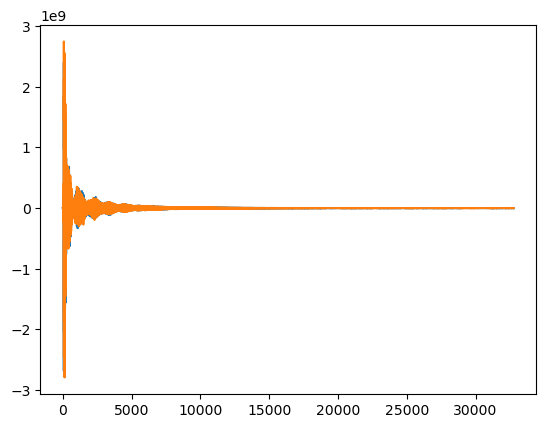

In [98]:
from matplotlib import pyplot as plt
import nmrglue as ng
import numpy as np

import os

# Specify the relative path to the directory
relative_path = '/Users/josuehernandez/Downloads/NMR Files/RAW/JH_OA_CDCl3_103123/20'

# Convert to absolute path
nmr_file_path = os.path.abspath(relative_path)

# Check if the directory exists
if os.path.exists(nmr_file_path):
    # Load the NMR data
    dic, data = ng.bruker.read(nmr_file_path)
    print(data.real)
    plt.plot(data.real)
    plt.plot(data.imag)


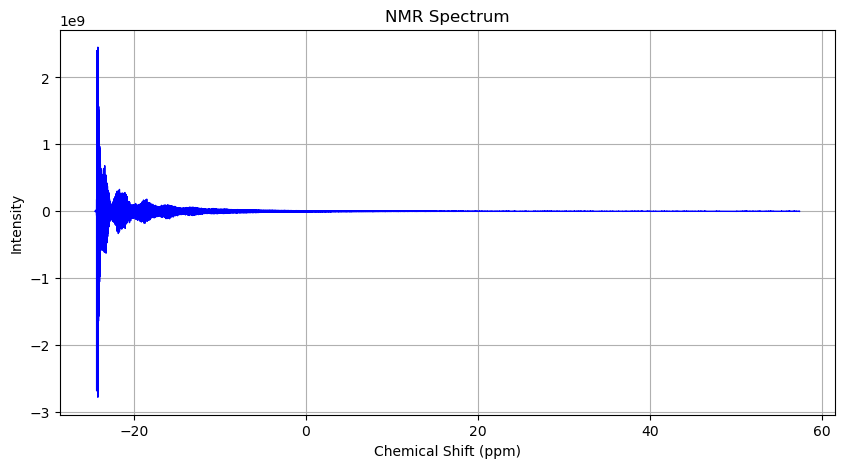

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import nmrglue as ng
import os

# Specify the relative path to the directory
relative_path = '/Users/josuehernandez/Downloads/NMR Files/RAW/JH_OA_CDCl3_103123/20'

# Convert to absolute path
nmr_file_path = os.path.abspath(relative_path)

# Check if the directory exists
if os.path.exists(nmr_file_path):
    # Load the NMR data
    dic, data = ng.bruker.read(nmr_file_path)

    # Extract data from 'acqus' and 'procs' dictionaries
    acqus = dic['acqus']
    procs = dic['procs']

    # Ensure 'your_spectral_data' has the correct length (32768) or half the 'procs['SI']' value
    your_spectral_data = data  # Modify this line accordingly

    # Calculate the spectral width considering half of 'procs['SI']'
    spectral_width = procs['SI'] / (2 * acqus['BF1'])
    offset = procs['OFFSET']

    # Generate the chemical shift axis with half the number of points
    chemical_shift_axis = np.linspace(offset - spectral_width / 2, offset + spectral_width / 2, len(your_spectral_data))

    # Create the NMR plot
    plt.figure(figsize=(10, 5))
    plt.plot(chemical_shift_axis, your_spectral_data, color='b', linewidth=1)
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Intensity')
    plt.title('NMR Spectrum')
    plt.grid(True)
    plt.show()
else:
    print("NMR data directory not found.")


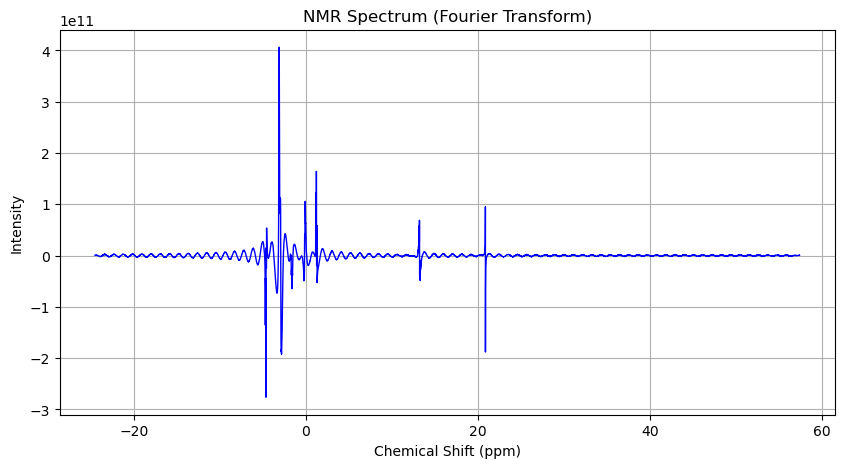

In [69]:
# VERSION 2
import numpy as np
import matplotlib.pyplot as plt
import nmrglue as ng
import os

# Specify the relative path to the directory
relative_path = '/Users/josuehernandez/Downloads/NMR Files/RAW/JH_OA_CDCl3_103123/20'

# Convert to absolute path
nmr_file_path = os.path.abspath(relative_path)

# Check if the directory exists
if os.path.exists(nmr_file_path):
    # Load the NMR data
    dic, data = ng.bruker.read(nmr_file_path)

    # Extract data from 'acqus' and 'procs' dictionaries
    acqus = dic['acqus']
    procs = dic['procs']

    # Perform Fourier transform on the data
    ft_data = ng.proc_base.fft(data)

    # Calculate the spectral width considering half of 'procs['SI']'
    spectral_width = procs['SI'] / (2 * acqus['BF1'])
    offset = procs['OFFSET']

    # Generate the chemical shift axis with half the number of points
    chemical_shift_axis = np.linspace(offset - spectral_width / 2, offset + spectral_width / 2, len(ft_data))

    # Create the NMR plot
    plt.figure(figsize=(10, 5))
    plt.plot(chemical_shift_axis, ft_data, color='b', linewidth=1)
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Intensity')
    plt.title('NMR Spectrum (Fourier Transform)')
    plt.grid(True)
    plt.show()
else:
    print("NMR data directory not found.")


/Users/josuehernandez/opt/anaconda3/envs/programming/lib/python3.10/site-packages/nmrglue/fileio/bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


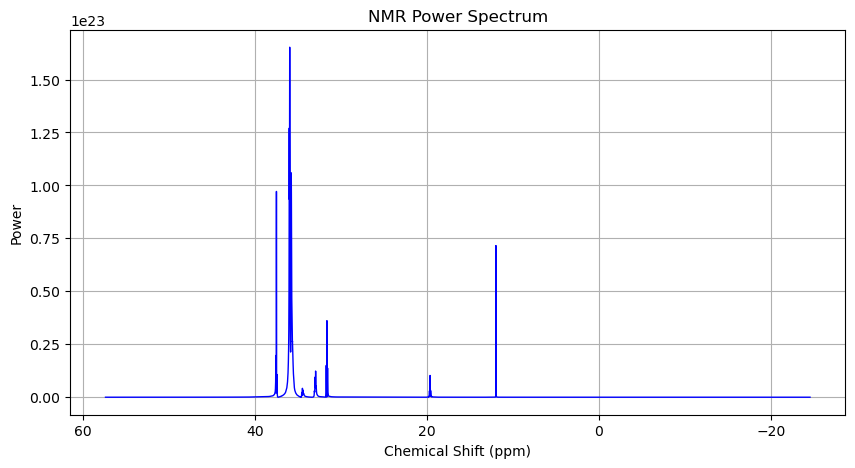

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import nmrglue as ng
import os

# Specify the relative path to the directory
relative_path = '/Users/josuehernandez/Downloads/NMR Files/RAW/JH_OA_CDCl3_103123/20'

# Convert to absolute path
nmr_file_path = os.path.abspath(relative_path)

# Check if the directory exists
if os.path.exists(nmr_file_path):
    # Load the NMR data
    dic, data = ng.bruker.read(nmr_file_path)

    # Extract data from 'acqus' and 'procs' dictionaries
    acqus = dic['acqus']
    procs = dic['procs']

    # Perform Fourier transform on the data
    ft_data = ng.proc_base.fft(data)

    # Calculate the spectral width considering half of 'procs['SI']'
    spectral_width = procs['SI'] / (2 * acqus['BF1'])
    offset = procs['OFFSET']

    # Generate the chemical shift axis with half the number of points
    chemical_shift_axis = np.linspace(offset + spectral_width / 2, offset - spectral_width / 2, len(ft_data))

    # Calculate the power spectrum
    power_spectrum = np.abs(ft_data) ** 2

    # Create the NMR plot
    plt.figure(figsize=(10, 5))
    plt.plot(chemical_shift_axis, power_spectrum, color='b', linewidth=1)
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Power')
    plt.title('NMR Power Spectrum')
    plt.grid(True)
    plt.gca().invert_xaxis()  # Invert the x-axis
    plt.show()
else:
    print("NMR data directory not found.")


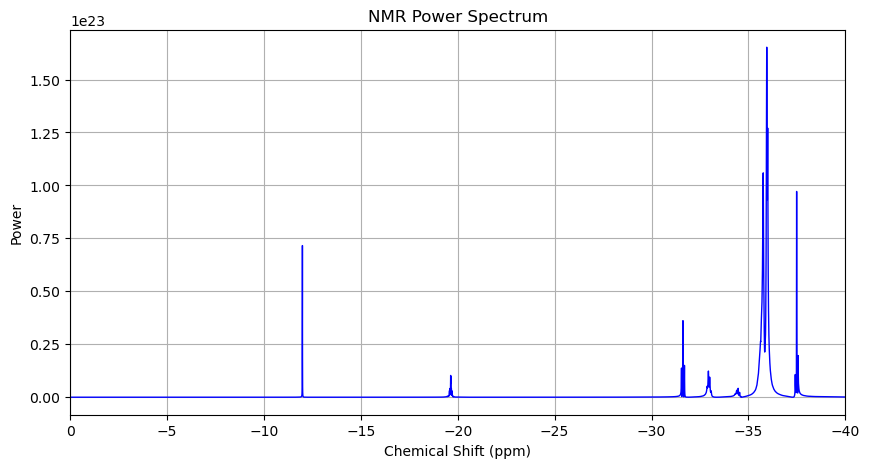

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import nmrglue as ng
import os

# Specify the relative path to the directory
relative_path = '/Users/josuehernandez/Downloads/NMR Files/RAW/JH_OA_CDCl3_103123/20'

# Convert to absolute path
nmr_file_path = os.path.abspath(relative_path)

# Check if the directory exists
if os.path.exists(nmr_file_path):
    # Load the NMR data
    dic, data = ng.bruker.read(nmr_file_path)

    # Extract data from 'acqus' and 'procs' dictionaries
    acqus = dic['acqus']
    procs = dic['procs']

    # Perform Fourier transform on the data
    ft_data = ng.proc_base.fft(data)

    # Calculate the spectral width considering half of 'procs['SI']'
    spectral_width = procs['SI'] / (2 * acqus['BF1'])
    offset = procs['OFFSET']

    # Generate the chemical shift axis with half the number of points and flip it
    chemical_shift_axis = -np.linspace(offset + spectral_width / 2, offset - spectral_width / 2, len(ft_data))

    # Calculate the power spectrum
    power_spectrum = np.abs(ft_data) ** 2

    # Create the NMR plot
    plt.figure(figsize=(10, 5))
    plt.plot(chemical_shift_axis, power_spectrum, color='b', linewidth=1)
    plt.xlim([0,-40])
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Power')
    plt.title('NMR Power Spectrum')
    plt.grid(True)
    plt.show()
else:
    print("NMR data directory not found.")


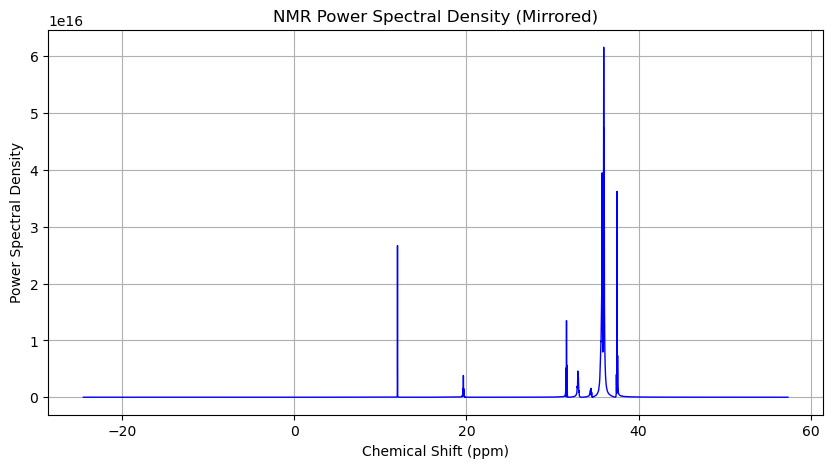

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import nmrglue as ng
import os

# Specify the relative path to the directory
relative_path = '/Users/josuehernandez/Downloads/NMR Files/RAW/JH_OA_CDCl3_103123/20'

# Convert to absolute path
nmr_file_path = os.path.abspath(relative_path)

# Check if the directory exists
if os.path.exists(nmr_file_path):
    # Load the NMR data
    dic, data = ng.bruker.read(nmr_file_path)

    # Extract data from 'acqus' and 'procs' dictionaries
    acqus = dic['acqus']
    procs = dic['procs']

    # Perform Fourier transform on the data
    ft_data = ng.proc_base.fft(data)

    # Calculate the spectral width considering half of 'procs['SI']'
    spectral_width = procs['SI'] / (2 * acqus['BF1'])
    offset = procs['OFFSET']

    # Generate the chemical shift axis with half the number of points
    chemical_shift_axis = np.linspace(offset + spectral_width / 2, offset - spectral_width / 2, len(ft_data))

    # Calculate the power spectral density
    power_spectral_density = (np.abs(ft_data) ** 2) / (spectral_width * len(ft_data))

    # Reverse both arrays to mirror the data
    chemical_shift_axis = chemical_shift_axis[::-1]
    power_spectral_density = power_spectral_density[::-1]

    # Create the NMR plot
    plt.figure(figsize=(10, 5))
    plt.plot(chemical_shift_axis, power_spectral_density, color='b', linewidth=1)
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Power Spectral Density')
    plt.title('NMR Power Spectral Density (Mirrored)')
    plt.grid(True)
    plt.show()
else:
    print("NMR data directory not found.")


Spectral Width: 8196.72131147543 Hz
Observed Frequency: 400.202471235 MHz
Offset: 2471.235 Hz
Number of Data Points: 65536


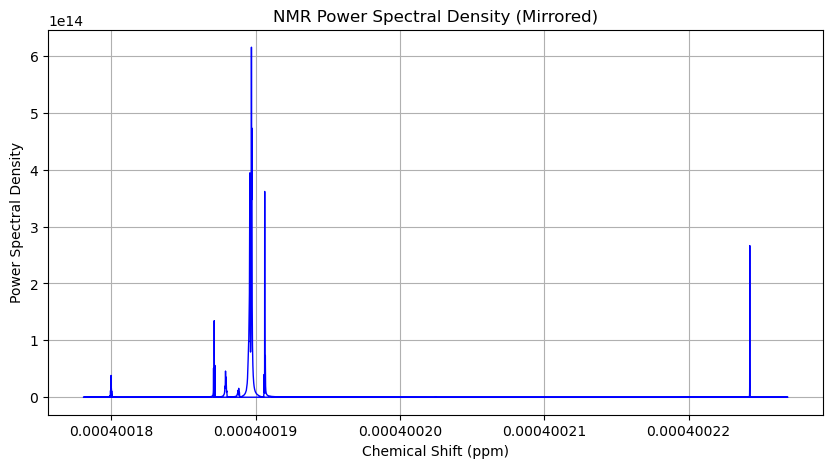

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import nmrglue as ng
import os

# Parameters and header details from your NMR data
import nmrglue as ng
import os

# Specify the relative path to the directory
relative_path = '/Users/josuehernandez/Downloads/NMR Files/RAW/JH_OA_CDCl3_103123/20'

# Convert to absolute path
nmr_directory = os.path.abspath(relative_path)

# Load the NMR data
dic, data = ng.bruker.read(nmr_directory)

# Extract key parameters from the 'acqus' and 'procs' dictionaries
acqus = dic['acqus']
procs = dic['procs']

# Important parameters
spectral_width = procs['SW_p']
observed_frequency = acqus['SFO1']
offset = acqus['O1']
n_points = procs['SI']

print(f"Spectral Width: {spectral_width} Hz")
print(f"Observed Frequency: {observed_frequency} MHz")
print(f"Offset: {offset} Hz")
print(f"Number of Data Points: {n_points}")

# Perform Fourier transform on the data
ft_data = ng.proc_base.fft(data)

# Calculate the spectral width in Hz
spectral_width = acqus['SW']

# Calculate the spectrometer frequency in MHz
spectrometer_frequency = acqus['SFO1'] / 1e6

# Calculate the correct chemical shift axis in ppm
chemical_shift_axis = (spectrometer_frequency - (np.fft.fftfreq(len(ft_data), spectral_width) * spectrometer_frequency))

# Calculate the power spectral density
power_spectral_density = (np.abs(ft_data) ** 2) / (spectral_width * len(ft_data))

# Reverse both arrays to mirror the data
chemical_shift_axis = chemical_shift_axis[::-1]
power_spectral_density = power_spectral_density[::-1]

# Create the NMR plot
plt.figure(figsize=(10, 5))
plt.plot(chemical_shift_axis, power_spectral_density, color='b', linewidth=1)
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('Power Spectral Density')
plt.title('NMR Power Spectral Density (Mirrored)')
plt.grid(True)
plt.show()
